# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from [Kaggle](https://www.kaggle.com/yelp-dataset/yelp-dataset) although we have taken steps to pull this data into a publis s3 bucket: `s3://sta9760-yelpdataset/yelp-light/*business.json`

# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. At the very least, you must install `pandas` and `matplotlib`

In [1]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1637602997939_0001,pyspark,dead,Link,Link,


In [2]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
#sc.install_pypi_package("seaborn==0.11.2")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
1,application_1637602997939_0002,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/34/895006117f6fce0b4de045c87e154ee4a20c68ec0a4c9a36d900888fb6bc/pyparsing-3.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_

## Importing

Now, import the installed packages from the previous block below.

In [3]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Loading Data

We are finally ready to load data. Using `spark` load the data from S3 into a `dataframe` object that we can manipulate further down in our analysis.

In [4]:
business = spark.read.json('s3://sta9760yelpdataset/yelp/yelp_academic_dataset_business.json')
review = spark.read.json('s3://sta9760yelpdataset/yelp/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [5]:
business.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+--------------------+--------------------+--------------------+-----------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|            address|          attributes|         business_id|          categories|       city|               hours|is_open|     latitude|      longitude|                name|postal_code|review_count|stars|state|
+-------------------+--------------------+--------------------+--------------------+-----------+--------------------+-------+-------------+---------------+--------------------+-----------+------------+-----+-----+
|       921 Pearl St|[,, 'beer_and_win...|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|    Boulder|[11:0-23:0, 11:0-...|      1|   40.0175444|   -105.2833481| Oskar Blues Taproom|      80302|          86|  4.0|   CO|
|7000 NE Airport Way|[,, u'beer_and_wi...|tCbdrRPZA0oiIYSmH...|Salad, Soup, Sand...|   Portland|[5:0-18:0, 5:0-18...|      1|45.5889058992|-122.

## Overview of Data

Display the number of rows and columns in our dataset.

In [6]:
print(f"Number of columns in Business table: {len(business.columns)}")
print(f"Number of rows in Business table: {business.count()}")
print(f"Number of columns in Review table: {len(review.columns)}")
print(f"Number of rows in Review table: {review.count()}")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Number of columns in Business table: 14
Number of rows in Business table: 160585
Number of columns in Review table: 9
Number of rows in Review table: 8635403

Display the DataFrame schema below.

In [7]:
business.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:

* `business_id`
* `name`
* `city`
* `state`
* `categories`

In [8]:
business.select("business_id","name","city","state","categories").show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+--------------------+
|         business_id|                name|       city|state|          categories|
+--------------------+--------------------+-----------+-----+--------------------+
|6iYb2HFDywm3zjuRg...| Oskar Blues Taproom|    Boulder|   CO|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Flying Elephants ...|   Portland|   OR|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|      The Reclaimory|   Portland|   OR|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|         Great Clips|Orange City|   FL|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|   Crossfit Terminus|    Atlanta|   GA|Gyms, Active Life...|
+--------------------+--------------------+-----------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: **how many unique categories are represented in this dataset?**

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:

* How many businesses are categorized as `Active Life`, for instance
* What are the top 20 most popular categories available?

## Association Table

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

For instance, given the following:


| business_id | categories |
|-------------|------------|
| abcd123     | a,b,c      |

We would like to derive something like:

| business_id | category |
|-------------|------------|
| abcd123     | a          |
| abcd123     | b          |
| abcd123     | c          |


What this does is allow us to then perform a myriad of rollups and other analysis on this association table which can aid us in answering the questions asked above.

Implement the code necessary to derive the table described from your original yelp dataframe.

In [9]:
from pyspark.sql.functions import explode,split

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
business_sel = business.select("business_id","categories")
business_sel.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|6iYb2HFDywm3zjuRg...|Gastropubs, Food,...|
|tCbdrRPZA0oiIYSmH...|Salad, Soup, Sand...|
|bvN78flM8NLprQ1a1...|Antiques, Fashion...|
|oaepsyvc0J17qwi8c...|Beauty & Spas, Ha...|
|PE9uqAjdw0E4-8mjG...|Gyms, Active Life...|
+--------------------+--------------------+
only showing top 5 rows

Display the first 5 rows of your association table below.

In [11]:
business_sel_explod = business_sel.withColumn('categories',explode(split('categories',', ')))
business_sel_explod.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+
|         business_id|  categories|
+--------------------+------------+
|6iYb2HFDywm3zjuRg...|  Gastropubs|
|6iYb2HFDywm3zjuRg...|        Food|
|6iYb2HFDywm3zjuRg...|Beer Gardens|
|6iYb2HFDywm3zjuRg...| Restaurants|
|6iYb2HFDywm3zjuRg...|        Bars|
+--------------------+------------+
only showing top 5 rows

## Total Unique Categories

Finally, we are ready to answer the question: **what is the total number of unique categories available?**

Below, implement the code necessary to calculate this figure.

In [12]:
business_sel_explod.select('categories').distinct().count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1330

## Top Categories By Business

Now let's find the top categories in this dataset by rolling up categories.

### Counts of Businesses / Category

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

The expected output should be:

| category | count |
|-------------|------------|
| a     | 15         |
| b     | 2          |
| c     | 45          |

Or something to that effect.

In [13]:
business_sel_explod.groupby('categories').count().show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|      Dermatologists|  351|
|      Paddleboarding|   67|
|        Aerial Tours|    8|
|         Hobby Shops|  610|
|          Bubble Tea|  779|
|             Embassy|    9|
|             Tanning|  701|
|            Handyman|  507|
|      Aerial Fitness|   13|
|             Falafel|  141|
|       Outlet Stores|  184|
|        Summer Camps|  308|
|     Clothing Rental|   37|
|      Sporting Goods| 1864|
|     Cooking Schools|  114|
|  College Counseling|   20|
|  Lactation Services|   47|
|Ski & Snowboard S...|   55|
|             Museums|  336|
|     Baseball Fields|   17|
+--------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories. 

**HINT**: don't forget about the matplotlib magic!

```
%matplot plt
```

In [14]:
business_cat_sorted = business_sel_explod.groupby('categories').count().orderBy('count',ascending = False)
business_cat_sorted.show(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|         Restaurants|50763|
|                Food|29469|
|            Shopping|26205|
|       Beauty & Spas|16574|
|       Home Services|16465|
|    Health & Medical|15102|
|      Local Services|12192|
|           Nightlife|11990|
|                Bars|10741|
|          Automotive|10119|
|Event Planning & ...| 9644|
|         Active Life| 9231|
|        Coffee & Tea| 7725|
|          Sandwiches| 7272|
|             Fashion| 6599|
|American (Traditi...| 6541|
|         Hair Salons| 5900|
|               Pizza| 5756|
|     Hotels & Travel| 5703|
|  Breakfast & Brunch| 5505|
+--------------------+-----+
only showing top 20 rows

In [15]:
business_top20_df = business_cat_sorted.limit(20).toPandas()
business_top20_df

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                   categories  count
0                 Restaurants  50763
1                        Food  29469
2                    Shopping  26205
3               Beauty & Spas  16574
4               Home Services  16465
5            Health & Medical  15102
6              Local Services  12192
7                   Nightlife  11990
8                        Bars  10741
9                  Automotive  10119
10  Event Planning & Services   9644
11                Active Life   9231
12               Coffee & Tea   7725
13                 Sandwiches   7272
14                    Fashion   6599
15     American (Traditional)   6541
16                Hair Salons   5900
17                      Pizza   5756
18            Hotels & Travel   5703
19         Breakfast & Brunch   5505

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

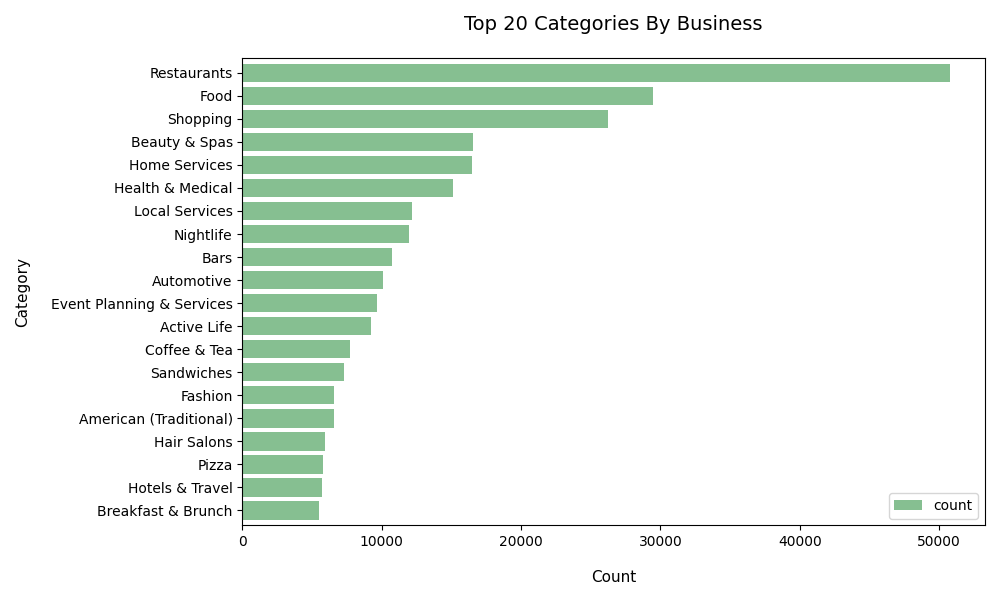

In [16]:
ax = business_top20_df.plot(kind='barh', x='categories', y='count', 
            figsize=(10, 6), color = '#86bf91', width = 0.8)
ax.set_xlabel("Count", size=11, labelpad = 15)
ax.set_ylabel("Category", size=11, labelpad = 15)
ax.set_title("Top 20 Categories By Business", size=14,pad = 20)
plt.tight_layout()
plt.gca().invert_yaxis()
%matplot plt

# Do Yelp Reviews Skew Negative?

Oftentimes, it is said that the only people who write a written review are those who are extremely _dissatisfied_ or extremely _satisfied_ with the service received. 

How true is this really? Let's try and answer this question.

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [17]:
review.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the `business_id` and `stars` columns together for the user reviews data.

In [18]:
review_sel = review.select('business_id','stars')
review_sel.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|buF9druCkbuXLX526...|  4.0|
|RA4V8pr014UyUbDvI...|  4.0|
|_sS2LBIGNT5NQb6PD...|  5.0|
|0AzLzHfOJgL7ROwhd...|  2.0|
|8zehGz9jnxPqXtOc7...|  4.0|
+--------------------+-----+
only showing top 5 rows

Now, let's aggregate along the `stars` column to get a resultant dataframe that displays _average stars_ per business as accumulated by users who **took the time to submit a written review**.

In [19]:
avg_stars = review_sel.groupby('business_id').mean()
avg_stars.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----------------+
|         business_id|       avg(stars)|
+--------------------+-----------------+
|yHtuNAlYKtRZniO8O...|4.714285714285714|
|R0IJhEI-zSJpYT1YN...|3.606060606060606|
|uEUweopM30lHcVxjO...|              3.0|
|L3WCfeVozu5etMhz4...|              4.2|
|XzXcpPCb8Y5huklEN...|4.666666666666667|
+--------------------+-----------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by `business_id`. 

In [20]:
business_sub = business.select('business_id', 'name', 'city', 'state', 'stars')
rev_sel = avg_stars.join(business_sub, business_sub.business_id == avg_stars.business_id)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Let's see a few of these:

In [21]:
rev_sel_1 = rev_sel.select("name","city","state","avg(stars)","stars")
rev_sel_1.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+-----+------------------+-----+
|                name|      city|state|        avg(stars)|stars|
+--------------------+----------+-----+------------------+-----+
|    CheraBella Salon|   Peabody|   MA|               5.0|  5.0|
|Mezcal Cantina & ...|  Columbus|   OH|             3.875|  4.0|
|    Red Table Coffee|    Austin|   TX|3.8666666666666667|  4.0|
|          WonderWell|    Austin|   TX|               5.0|  5.0|
|         Avalon Oaks|Wilmington|   MA|             3.375|  3.5|
+--------------------+----------+-----+------------------+-----+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the _skew_ (for lack of a better word) between the avg stars accumulated from written reviews and the _actual_ star rating of a business (ie: the average of stars given by reviewers who wrote an actual review **and** reviewers who just provided a star rating).

The formula you can use is something like:

```
(row['avg(stars)'] - row['stars']) / row['stars']
```

If the **skew** is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If **skew** is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [22]:
from pyspark.sql.functions import col
rev_skew = rev_sel_1.withColumn("skew",(col("avg(stars)") - col("stars")) / col("stars"))
skew = rev_skew.select('skew').toPandas()
rev_skew.show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------+-----+------------------+-----+--------------------+
|                name|      city|state|        avg(stars)|stars|                skew|
+--------------------+----------+-----+------------------+-----+--------------------+
|    CheraBella Salon|   Peabody|   MA|               5.0|  5.0|                 0.0|
|Mezcal Cantina & ...|  Columbus|   OH|             3.875|  4.0|            -0.03125|
|    Red Table Coffee|    Austin|   TX|3.8666666666666667|  4.0|-0.03333333333333...|
|          WonderWell|    Austin|   TX|               5.0|  5.0|                 0.0|
|         Avalon Oaks|Wilmington|   MA|             3.375|  3.5|-0.03571428571428571|
+--------------------+----------+-----+------------------+-----+--------------------+
only showing top 5 rows

And finally, graph it!

In [23]:
rating_skew_only = rev_skew.select('skew')
rating_temp = rating_skew_only.toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
plt.clf()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

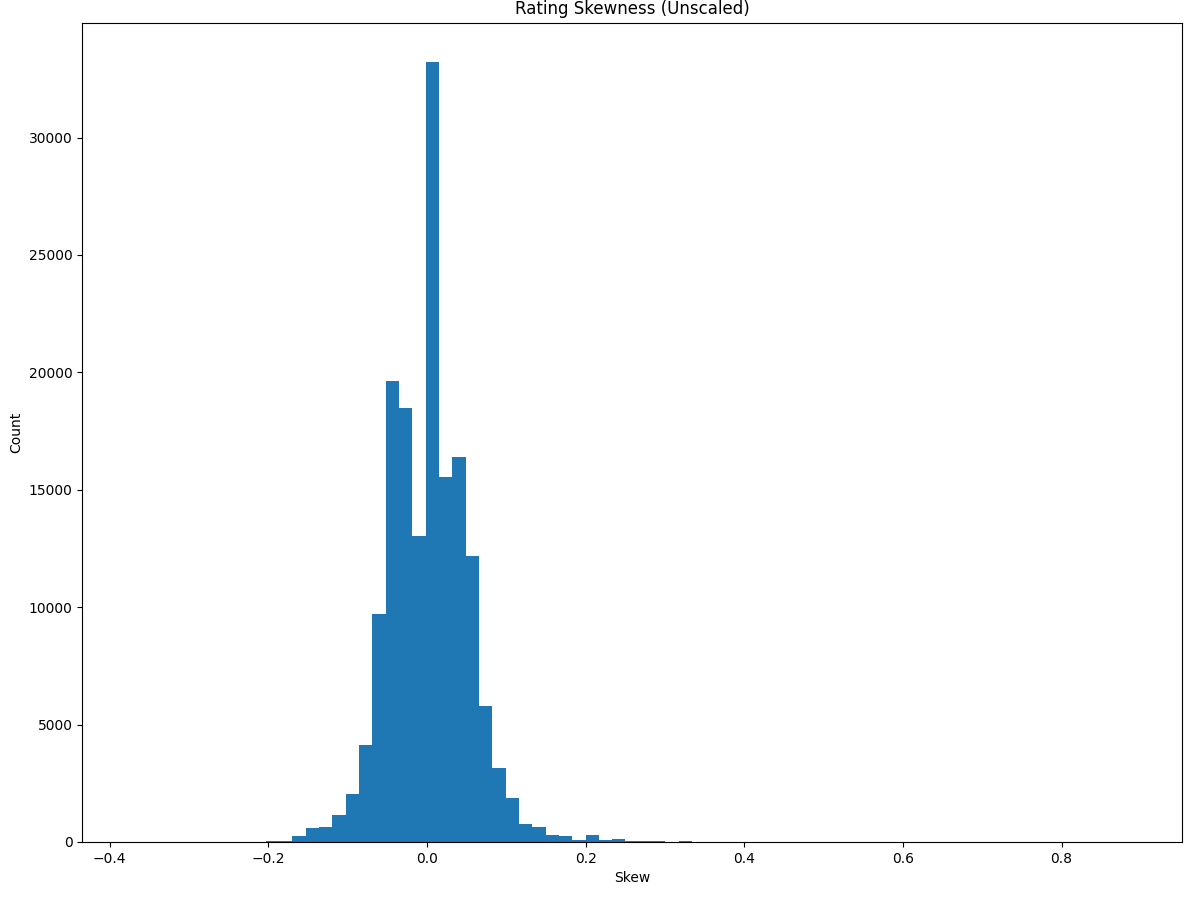

In [25]:
import matplotlib
skew = rating_temp['skew']

ax = plt.hist(skew,bins = 75)
plt.tight_layout()
plt.xlabel('Skew')
plt.ylabel('Count')
plt.title('Rating Skewness (Unscaled)')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12,9)
plt.show()
%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph. 

# Should the Elite be Trusted? (Or, some other analysis of your choice)

For the final portion - you have a choice:

* Try and analyze some interesting dimension to this data. The **ONLY** requirement is that you must use the **Users** dataset and join on either the **business* or **reviews** dataset
* Or, you may try and answer the question posed: how accurate or close are the ratings of an "elite" user (check Users table schema) vs the actual business rating.

Feel free to use any and all methodologies at your disposal - only requirement is you must render one visualization in your analysis

# Part1
Finding out if an elite user can be trusted or not by comparing an elite user rating to the actual business rating.

Load the user data from s3.

In [26]:
user = spark.read.json('s3://sta9760yelpdataset/yelp/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Begin by joining the business dataframe and the review dataframe on business_id.As both dataframe has same column named 'stars',so in order to avoid the repetition of the two columns that have the same name,it is necessary to change the name to business_stars and review_stars in the business dataframe and review dataframe, respectively.

In [27]:
business = business.withColumnRenamed('stars',"business_stars")
review = review.withColumnRenamed('stars',"review_stars")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [28]:
business_join_review = business.join(review, on=['business_id'], how='inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Then,to join the user dataframe with the business_join_review dataframe to see what rating does a user give to a restaurant.

In [29]:
business_user_review = user.join(business_join_review, on=['user_id'], how='inner')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Filtering out the non-elite user to see only elite users.

In [30]:
business_user_review.select('business_id','business_stars','review_stars','user_id','elite').sort('business_id','user_id').filter(business_user_review['elite'] != '').show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+------------+--------------------+--------------------+
|         business_id|business_stars|review_stars|             user_id|               elite|
+--------------------+--------------+------------+--------------------+--------------------+
|--0zrn43LEaB4jUWT...|           1.0|         1.0|Du8CplP209Es9T3FY...|                2008|
|--164t1nclzzmca7e...|           4.0|         3.0|1P9BpFZ_d3PGCdytD...|      2010,2011,2012|
|--164t1nclzzmca7e...|           4.0|         5.0|3d4fac-e3Plyib8QU...|2017,2018,2019,20,20|
|--164t1nclzzmca7e...|           4.0|         4.0|4ZfHbIbmyTuCX0BXN...| 2012,2013,2014,2015|
|--164t1nclzzmca7e...|           4.0|         5.0|5GHfNK-pcCYJon1cS...|                2010|
|--164t1nclzzmca7e...|           4.0|         5.0|5GHfNK-pcCYJon1cS...|                2010|
|--164t1nclzzmca7e...|           4.0|         1.0|8P8dgzKDQg7OSlEiA...|     2018,2019,20,20|
|--164t1nclzzmca7e...|           4.0|         4.0|8XlB-J73QOFV91Y0e...



Appending a column to represent percentage change between the business actual rating and the rating given by an elite user by using the following formula:

```
(abs(review_stars - business_stars) / business_stars) * 100
```

It is necessary to get the figure in positive number while taking a difference of the business rating and the user rating so making use of abs built in function.The main output is to get how much is the difference between the business rating and the user rating.

In [31]:
from pyspark.sql.functions import mean, stddev, col, abs, split, explode
from pyspark.sql import functions as F

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
business_user_review = business_user_review.withColumn('%_difference',(abs((business_user_review['review_stars']-business_user_review['business_stars'])*-1)/business_user_review['business_stars'])*100)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [33]:
business_user_review = business_user_review.select('business_id','business_stars','review_stars','%_difference','user_id','elite').sort('business_id').filter(business_user_review.elite!='')
business_user_review.show(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------+------------+------------+--------------------+--------------------+
|         business_id|business_stars|review_stars|%_difference|             user_id|               elite|
+--------------------+--------------+------------+------------+--------------------+--------------------+
|--0zrn43LEaB4jUWT...|           1.0|         1.0|         0.0|Du8CplP209Es9T3FY...|                2008|
|--164t1nclzzmca7e...|           4.0|         5.0|        25.0|llksdcDyLTNkiibAQ...|2009,2010,2011,20...|
|--164t1nclzzmca7e...|           4.0|         5.0|        25.0|kTY5w80WqY4Ak-jac...|           2012,2013|
|--164t1nclzzmca7e...|           4.0|         1.0|        75.0|Jgxz4UF56FK0taE4i...|           2012,2013|
|--164t1nclzzmca7e...|           4.0|         3.0|        25.0|wwrlJT3JLb-A_0Nrl...|2008,2009,2010,20...|
|--164t1nclzzmca7e...|           4.0|         4.0|         0.0|DA90NhtNTNpXxdrXI...|2010,2011,2012,20...|
|--164t1nclzzmca7e...|           4.0|         

Descriptive statistics of the percentage differnece.

In [34]:
business_user_review.describe(['%_difference']).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|      %_difference|
+-------+------------------+
|  count|           2169088|
|   mean|22.243313121181657|
| stddev| 21.02747472303388|
|    min|               0.0|
|    max|             400.0|
+-------+------------------+

Creating a histogram based on the percentage difference of an elite user rating and a business rating.

In [35]:
business_user_review_plot = business_user_review.select('%_difference').toPandas()
business_user_review_plot.plot.hist(bins=50)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

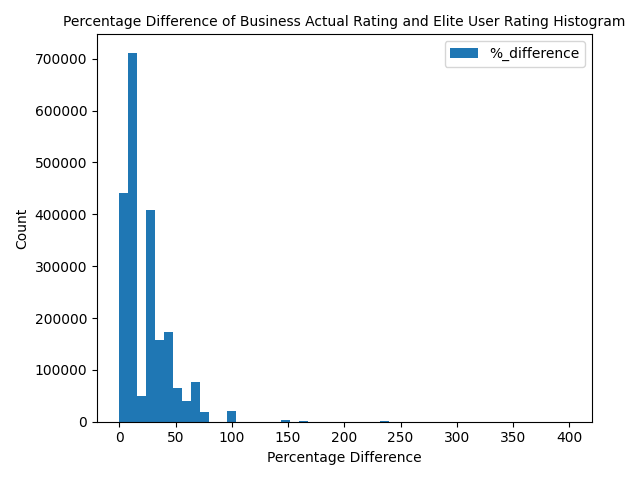

In [36]:
import matplotlib.pyplot as plt
plt.xlabel('Percentage Difference')
plt.ylabel('Count')
plt.xticks()
plt.yticks()
plt.title('Percentage Difference of Business Actual Rating and Elite User Rating Histogram',fontsize=10)
plt.tight_layout()
plt.show()
%matplot plt



The histogram displays that the elite user review are 50% less different from the actual business review.

In order to get more detailed insights of how the elite user reviews is different from the business review,it is necessary to look at the percentage of different ranges.

In [37]:
total = business_user_review.count()

less_25 = business_user_review.filter(business_user_review['%_difference'] <= 25).count()
print(f'Percentage Difference <= 25%: {less_25}, Percentage: {(less_25/total)*100}%')

greate_25_less_50 = business_user_review.filter(business_user_review['%_difference'] > 25).filter(business_user_review['%_difference'] <= 50).count()
print(f'Percentage Difference >25 and <= 50%: {greate_25_less_50}, Percentage: {(greate_25_less_50/total)*100}%')

greate_50_less_75 = business_user_review.filter(business_user_review['%_difference'] > 50).filter(business_user_review['%_difference'] <= 75).count()
print(f'Percentage Difference >40 and <= 60%: {greate_50_less_75}, Percentage: {(greate_50_less_75/total)*100}%')

greate_75_less_100 = business_user_review.filter(business_user_review['%_difference'] > 75).filter(business_user_review['%_difference'] <= 100).count()
print(f'Percentage Difference >60 and <= 80%: {greate_75_less_100}, Percentage: {(greate_75_less_100/total)*100}%')

greate_100 = business_user_review.filter(business_user_review['%_difference'] > 100).count()
print(f'Percentage Difference >100: {greate_100}, Percentage: {(greate_100/total)*100}%')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Percentage Difference <= 25%: 1611488, Percentage: 74.29334356190252%
Percentage Difference >25 and <= 50%: 386522, Percentage: 17.819562876194972%
Percentage Difference >40 and <= 60%: 140623, Percentage: 6.483047253039064%
Percentage Difference >60 and <= 80%: 24787, Percentage: 1.1427383305794878%
Percentage Difference >100: 5668, Percentage: 0.2613079782839608%

In [38]:
df_percentage = spark.createDataFrame(
    [
        ('[0%,25%]', (less_25/total)*100), 
        ('(25%,50%]', (greate_25_less_50/total)*100),
        ('(50%,75%]', (greate_50_less_75/total)*100),
        ('(75%,100%]', (greate_75_less_100/total)*100),
        ('(100%,∞)', (greate_100/total)*100),
    ],
    ['Difference_Percentage_Range', 'Percentage'] 
)

df_percentage.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------+------------------+
|Difference_Percentage_Range|        Percentage|
+---------------------------+------------------+
|                   [0%,25%]| 74.29334356190252|
|                  (25%,50%]|17.819562876194972|
|                  (50%,75%]| 6.483047253039064|
|                 (75%,100%]|1.1427383305794878|
|                   (100%,∞)|0.2613079782839608|
+---------------------------+------------------+

In [39]:
df_percentage_pandas = df_percentage.toPandas()
df_percentage_pandas = df_percentage_pandas.set_index('Difference_Percentage_Range')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

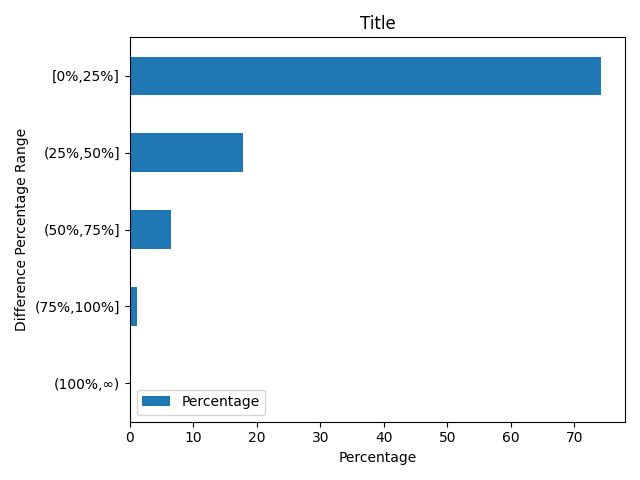

In [40]:
df_percentage_pandas.plot.barh().invert_yaxis()
plt.title('Title')
plt.xlabel('Percentage')
plt.ylabel('Difference Percentage Range')
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()
%matplot plt